In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
from pandas_profiling import ProfileReport
#from dataprep.eda import create_report

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)

### FIRST LET US HAVE A BRIEF SUMMARY OF THE DATA WERE WORKING WITH

In [28]:
df.shape

(8807, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### OUR DATA HASABOUT 8,807 samples and 12 feautures(8807 rows 12 colums)   and the summary tells us that there are a lot of missing values in it
We cant work directly with missing values as its going to affect the overall output and outcome of our data analysis and possible prediction  

I'm going to make a copy of the data before i start cleaning so as to still keep the loaded data intact

In [6]:
df1 = df.copy()

# DF1 is the CLEANED DATA

###### I WOULD LIKE TO KNOW THE PERCENTAGE OF THE MISSING VALUES I'M WORKING WITH AND IN WHAT COLUMNS, THIS WOULD INFLUENCE HOW I WOULD CLEAN THE DATA AND MAYBE DROP THE COLUMNS OR FILL IN THE VALUES FOR SOME

In [7]:
# THIS FUNCTION CALCULATES THE PERCENTAGE OF THE MISSING VALUES
def missing_pct(df):
    # Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')

    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


HOW WE ARE GOING TO WORK AROUND THE MISSING VALUES
1. country has many missing values, about 9% of it,not so wide of a difference, so we would just assume the missing countries are of the country with the highest frequency
2. cast and director missing values will be replaced with 'no data' has they have a high percentage of missing values. considering filling them with otherwise might give a wrong picture of casts and directors.
3. date_added would also be filled with the highest values.
4. i dont want to drop any values here yet as i dont want it to affect the count of what im working with
5. rating column would be handled later when we get there


In [37]:
#CLEANING THE DATA
df1['country'] = df1['country'].fillna(df1['country'].mode()[0])
df1['date_added'] = df1['date_added'].fillna(df1['date_added'].mode()[0])
df1['cast'].replace(np.nan, 'No Data',inplace  = True)
df1['director'].replace(np.nan, 'No Data',inplace  = True)
#df1.dropna(inplace=True)

# Drop Duplicates
df1.drop_duplicates(inplace= True)

# OVERALL TV SHOWS AND MOVIES ANALYSIS

#### there is a detailed analysis concerning the TV and showsanalysis in the EDA file, you can try to look it up


In [52]:
df_count = df1['show_id'].count().sum()
print ("THE TOTAL MOVIES FROM NETFLIX ARE:")
print(df_count)

print("            ")

# Split of showes and TV

print("THE SHOWS AND MOVIES DIVIDED")
print("  ")
df_type = df1.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {"show_id":"count_showids"})

print(df_type)

THE TOTAL MOVIES FROM NETFLIX ARE:
8807
            
THE SHOWS AND MOVIES DIVIDED
  
      type  count_showids
0    Movie           6131
1  TV Show           2676


In [10]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Indicator(
    value = df_count))

fig = fig.update_layout( 
        template = {'data' : {'indicator': [{
        'title': {'text': "Total content on Netflix"},}]
        }})

fig = fig.update_layout(
    #autosize=False,
    #width=500,
    height=100,
    margin=dict(l=50,r=50,b=0,t=1),)

# fig2 = px.pie(df_type, values='count_showids', names='type', color_discrete_sequence=px.colors.sequential.RdBu,
#        title='What type of titles are uploaded more on Netflix' , width=500, height=450)

fig.show()
#fig2.show()


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'pie'}]])
fig.add_trace(
    
    go.Bar(x= df_type['count_showids'], y= df_type['type'], orientation = 'h', marker=dict(color=["Maroon", "Grey"]), showlegend=False, 
           text = df_type['count_showids'], textposition='auto'),
    row=1, col=1)

fig.add_trace(
    
    go.Pie(labels=df_type['type'], values=df_type['count_showids'], marker_colors= ["Maroon", "Grey"]),
    row=1, col=2)

fig.update_layout(
    title_text="'What type of content is more uploaded more on Netflix?")
fig.show()

# LETS MOVE TO ANALYSE THE COUNTRY DATA

In [41]:
print('THEY ARE')
print(df.country.nunique())
print('countries')

THEY ARE
748
countries


##### THE DATA FROM THE EDA IS TELLING US THERE ARE ABOUT 748 COUNTRIES THE MOVIES ARE PRODUCED IN WHICH IS ERRONEOUS AS SOME MOVIES ARE PRODUCED IN MORE THAN ONE COUNTRY SO IT GIVES FALSE VALUE FOR THE DIFFERENT UNIQUE VALUES


NOW IM GOING TO UNPACK AND BRING OUT ALL THE INDIVIDUAL COUNTRIES THAT ARE PRESENT


AS FOR THE UNPACKED GRAPHICAL REPRESENTATION(CHARTS AND GRAPHS) IT CAN BE FOUND IN THE EDA FILE SENT EARLIER

In [12]:
# splitting the countries in different rows 
#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_country = df1[['show_id', 'title','type', 'country' ]]
df_country = (df_country.drop('country', axis=1)
             .join
             (
             df_country.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')           
             ))

In [45]:
print ("THE NUMBER OF COUNTRIES OF NETFLIX MOVIES FEATURED IS")
print(df_country.country.nunique())
print ("COUNTRIES AND IS BROKEN DOWN THUS:")
df_country.country.value_counts().to_frame()

THE NUMBER OF COUNTRIES OF NETFLIX MOVIES FEATURED IS
127
COUNTRIES AND IS BROKEN DOWN THUS:


,country
United States,4520
India,1046
United Kingdom,804
Canada,445
France,393
...,...
Bermuda,1
Ecuador,1
Armenia,1
Mongolia,1


###### LET'S KEEP IN MIND ALSO THAT WE ASSUMED THAT THAT THE MISSING COUNTRIES FROM OUR RAW DATA IS THE USA

In [46]:
df_country_viz_total = df_country[["title", "country"]]
df_country_viz_total = df_country_viz_total.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(15)
df_country_viz_total = df_country_viz_total.rename(columns = {"title": "movies_count",})

 
fig1 = px.bar(df_country_viz_total, x='country', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Top 15 countries with Netflix Content ')


df_country_viz = df_country[["title", "country"]]
df_country_viz = df_country_viz.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(15)

df_country_viz1 = df_country[["title", "type", "country"]]
df_country_viz1 = df_country_viz1.groupby(['country', 'type'])["title"].count().reset_index().sort_values('title', ascending= False)
df_country_viz1 = df_country_viz1.rename(columns = {"title": "movies_count",})

final1 = df_country_viz.merge(df_country_viz1, how = 'left', left_on = 'country', right_on = 'country')
final1['percentage'] = (final1['movies_count']/final1['title'])*100
final1['percentage'] = final1['percentage'].round(1)
final1['percent_string'] = final1['percentage'].astype(str)+ '%'


fig2 = px.bar(final1, x='country', y='percentage', color = 'type',
       title='Top 15 countries with Movie/TV show split ')

In [48]:
fig = go.Figure()
fig.add_trace(
    
go.Bar(x= df_country_viz_total['country'], y= df_country_viz_total['movies_count'], marker_color = 'Maroon',
           text = df_country_viz_total['movies_count'], textposition='auto'))

fig.update_layout(title_text = "Top 15 countries with Netflix Content"
                  , yaxis=dict(title='Movies/TV Shows Count'))
fig.show()

final_movie = final1.query("type == 'Movie'")
final_show = final1.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Bar(
    x=  final_movie['country'],
    y= final_movie['percentage'],
    showlegend=True,
    text = final_movie['percent_string'], 
    textposition='auto',
    name='Movie',
    marker_color='Maroon'    
    
))
fig.add_trace(go.Bar(
    x= final_show['country'],
    y= final_show['percentage'],
    showlegend=True,
    text = final_show['percent_string'], 
    textposition='auto',
    name='TV Show',
    marker_color='Grey' 
))



# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack', title_text = 'Top 15 countries with Movie/TV show split '
                  , yaxis=dict(title='% Movies/TV Shows Count'))
fig.show()

###### FROM THE DATA:
    As expected,

--United States tops the chart followed by India, United Kingdom, and Canada.
--Interestingly, the content available in India is heavily skewed towards movies, explaining the intuition about big influence    of bollywood in-house movie production. 
--South Korea has the highest percentage of TV shows and i'm not surprised as many people watch their series
--Japan is also slightly skewed towards series
  (one should just assume they like series too much in that part)

--United States is the top leaader in both movie and TV shows. India followed US in the overall content and it seems that it     has the most number of movies with very less percentage of TV shows comapred to UK and Japan.

##### HONG KONG BEING THE 15TH HIGHEST MOVIES PRODUCING COUNTRY ALSO HAS A PRETTY HEAVY SKEWNESS TOWARDS TV SHOWS
SO ITS POSSIBLE SOME 'HONG KONG SERIES' MIGHT HAVE BEEN MISTAKENLY LABELLED AS 'KOREAN MOVIES'

#  NOW LETS ANALYSE THE RATINGS FEAUTURES NOW

In [16]:
print("THESE ARE THE RATINGS PRESENT NOW")
df1.rating.value_counts()

THESE ARE THE RATINGS PRESNT NOW


TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

###### i noticed they are some ratings outside the normal ratings eg. 74m,66mins so i now want to replace them with TV_MA as it is the most frequent

In [17]:
df1['rating'] = df1['rating'].replace({'74 min': 'TV-MA', '84 min': 'TV-MA', '66 min': 'TV-MA'})
df1['rating'] = df1['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

In [60]:
print("THE NEW RATINGS WE'VE GOT NOW ARE:")
df1.rating.unique()

THE NEW RATINGS WE'VE GOT NOW ARE:


array(['Teens - Age above 12', 'Adults', 'Kids - with parental guidence',
       'Teens - Age above 14', 'Kids', 'Kids - Age above 7', 'NR', nan,
       'UR'], dtype=object)

In [19]:
# SO NOW I'M going to Rename values for Rating for better understanding(according to how netflix also didtinguished it)
df1['rating'] = df1['rating'].replace({
                'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                
})

## RENAMING IT GOES IN THIS WAY



THIS NAMING CONVENTION CAN BE REVIWED FROM THE NETFLIX SITE 
'PG-13': 'Teens - Age above 12',
                'TV-MA': 'Adults',
                'PG': 'Kids - with parental guidence',
                'TV-14': 'Teens - Age above 14',
                'TV-PG': 'Kids - with parental guidence',
                'TV-Y': 'Kids',
                'TV-Y7': 'Kids - Age above 7',
                'R': 'Adults',
                'TV-G': 'Kids',
                 'G': 'Kids',
                'NC-17': 'Adults',
                'NR': 'NR',
                'UR' : 'UR'
                

In [20]:

df_2 = df1.query("type == 'Movie'")
df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
px.bar(df_2, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='For which category the maximum content(Movies) are uploaded? ')

###### It seems the most content(Movies) on Netflix caters to Adults and then teens and kids and has evidenced fron the graph it is declining at the rate.

In [21]:
df_3 = df1.query("type == 'TV Show'")
df_3 = df_3[["title", "rating"]]
df_3 = df_3.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
df_3 = df_3.rename(columns = {"title": "movies_count"})
px.bar(df_3, x='rating', y='movies_count', color_discrete_sequence=['red'],
       title='For which category the maximum content(TV Shows) are uploaded?')

#### ADULTS TEENS AND KIDS ARE STILL THE MOSt RELEASED CONTENTS FOR TV SHOWS

# THE ANALYSES OF THE YEARS AND DATES 

###### LETS FIRST TRY TO GET THE TREND OF HOW MOVIES ON NETFLIX HAVE BEEN RELEASED OVER THE YEARS SINCE 2008

In [22]:
df_5 = df.query("release_year >= 2007")
df_5 = df_5.groupby("release_year")["show_id"].count().reset_index()

fig = px.area(df_5, x='release_year', y='show_id', color_discrete_sequence=px.colors.sequential.RdBu,
      title='Overall content release Trend since 2007(both movies and SHOWS)')
fig.show()

##### IT SEEMS GENERALLY NETFLIX TOUTS KEPT GOING UP OVER THE YEARS AND THAT WAS EVIDENcED IN THE PRODUCTION RATE;PEAKED IN 2018/2019 BUT KEPT GOING DOWN SINCE 2018;THIS CAN BE ATTRIBUTED TO CORONA

ALSO: THERE IS PRESENCE OF OTHER STREAMING NETWORKS LIKE AMAZON,PRIME TV HBO MAX OF WHICH THEY PROLLY STARTED OPERATION AROUND THAT 2019 ALSO

In [23]:
#df_4 = df.query("type == 'Movie'")
df_4 = df.query("release_year >= 2000")
df_4 = df_4.groupby(["type","release_year"])["show_id"].count().reset_index()
df_4_movie = df_4.query("type == 'Movie'")
df_4_show = df_4.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=  df_4_movie['release_year'],
    y= df_4_movie['show_id'],
    showlegend=True,
    text = df_4_movie['show_id'], 
    
    name='Movie',
    marker_color='Maroon'    
    
))
fig.add_trace(go.Scatter(
    x=  df_4_show['release_year'],
    y= df_4_show['show_id'],
    showlegend=True,
    text = df_4_show['show_id'], 
 
    name='TV Show',
    marker_color='Grey' 
))

fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Movies/TV Show release yearly Trend' )
fig.show()

#### FROM OUR DATA:
    1. MOVIES ARE STILL MORE PRODUCED OVER THE YEARS AS THERE IS NO INTERSECTION WHATSOEVER
    2. THE RATE AT WHICH MOVIES INCFREASED IS MORE THAN THE RATE AT WHICH SERIES INCRESAED
    3. BOTH THE SERIES AND MOVIES KEPT ON INCREASING TILL AROUND 2018/2019 WHERE MOVIES DROPPED DRASTICALLY 
    4. AT THE SAME RATE TV SHOWS CONTINUEs RISING IN 2019 AND THEN STARTED REDUCING LATE 2020 INTO 2021 AND STILL DIDNT REDUCE AS MUSH AS MOVIES
    5. SO IT IS SAFE TO SAY MOVIES ARE AFFECTED MORE THAN SERIES ON NETFLIX (MAYBE OTHER STREAMING PLATFORMS RELEASED MORE SERIES ANS LESS MOVIES)

[Text(0.5, 1.0, 'Number of movies released by Year')]

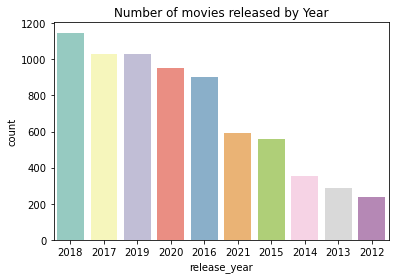

In [24]:
sns.countplot(x="release_year", data=df1,order = df1['release_year'].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')

#### JUST TO SHOW MOVIES WITH TOP 10 HIGHEST RELEASE YEARS AND THIS ALSO EXPLAINS THE DOWNWARD DECLINE SINCE 2018(2019 FIRST REDUCED TO 2017 PRODUCTION RATE ) AND HAS BEEN GOING DOWN FURTHER SINCE THEN

#### MAYBE NOW AS AN INVESTOR I SHOULD JUST MOVE AWAY FROM NETFLIX AS THEIR SALES HAS REALLY PLUMMETED

# NOW I WANT TO SEE THE AVERAGE TREND OF MONTHS NETFLIX RELEASED MOST OF ITS MOVIES MAYBE THERE IS MONTH THEY BELEIVE PRODUCTION COMES HIGHER OR NOT

In [25]:
df['month'] = pd.DatetimeIndex(df['date_added']).month

In [26]:
df_4 = df.query("release_year >= 2007")

df_4 = df_4[["type","month",'release_year', "show_id"]]
df_4 = df_4.groupby(['release_year', 'month', 'type'])['show_id'].count().reset_index()
df_4 = df_4.rename(columns = {"show_id": "total_shows"})
df_4 = df_4.groupby(['month', 'type'])['total_shows'].mean().reset_index()

df_4_movie = df_4.query("type == 'Movie'")
df_4_show = df_4.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=  df_4_movie['month'],
    y= df_4_movie['total_shows'],
    showlegend=True,
    text = df_4_movie['total_shows'], 
    name='Movie',
    marker_color='Maroon'    
    
))
fig.add_trace(go.Scatter(
    x=  df_4_show['month'],
    y= df_4_show['total_shows'],
    showlegend=True,
    text = df_4_show['total_shows'], 
    name='TV Show',
    marker_color='Grey' 
))

fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Movies/TV Shows average release monthly trend over the yes' )
fig.show()

###### It appears that there is no specific pattern in which we could see more movies are added to particular months. But for buth movies and TV shows added  spike  around EACH MARCH DECEMBER AND SEPTEMBER

ALSO MORE MOVIES ARE RELEASED THAN TV SERIES


### NOW LETS LOOK FOR THE TREND IN AND THE YEARS AROUND COVID AS THERE MIGHT BE A PATTERN THERE

In [29]:
def trend_yearwise(year):
    
    title = (f'Movies/TV Show release Month Trend for year {year}' )
    df_6 = df.query("release_year == @year")
    df_6 = df_6.groupby(["type","month"])["show_id"].count().reset_index()
    df_6_movie = df_6.query("type == 'Movie'")
    df_6_show = df_6.query("type == 'TV Show'")
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x=  df_6_movie['month'],
    y= df_6_movie['show_id'],
    showlegend=True,
    text = df_6_movie['show_id'], 
    name='Movie',
    marker_color='Maroon'    

    ))
    fig.add_trace(go.Scatter(
    x=  df_6_show['month'],
    y= df_6_show['show_id'],
    showlegend=True,
    text = df_6_show['show_id'], 
    name='TV Show',
        
    marker_color='Grey' 
    ))

    fig.update_traces( mode='lines+markers')
    fig.update_layout(title_text =  title )
    fig.show()
    
trend_yearwise(2019)  



In [30]:

    
trend_yearwise(2020)    

###### SO OBVIOSLY FROM BOTH GRAPHS FOR 2019 and 2020, IT IS NOTICED THAT THE MOVIES REDUCED IN LATE 2019 AND EARLY 2020 due to COVID 
THO IT STARTED RISING IN MARCH 2020

-END OF THE YEAR WAS TIPPED FOR MORE MOVIES TO BE RELEASED, BUT WE SAW THAT IN 2019, MOVIES AND
 TV SHOWS PRODUCTION RELEASED REDUCED AT THE END OF THE YEAR(THO TV SHOWS NOT AS MUCH AS MOVIES)
-ATB SOME POINT IN 2020 MOVIES PLUMMETED SO MUCH THAT THE TV SHOWS RISE MET UP WITH IT

# NEXT, I WANT TO GET THE DAYS WHICH HAVE THE HIGHEST RETURN OF MOVIES TO NETFLIX

In [62]:
    df_time_added = df1.copy()

In [63]:
df_time_added['date_added']=pd.to_datetime(df_time_added['date_added'])

<AxesSubplot:>

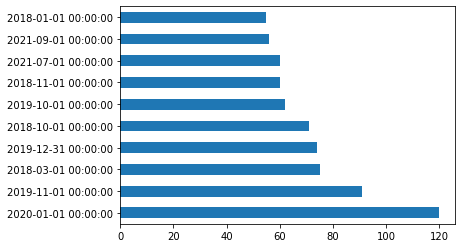

In [64]:
  df_time_added['date_added'].value_counts().head(10)[:20].plot(kind="barh")

## This tells us that more movies were added 1st jan 2020(This might be a bit skewed as 10 missing dates were assumed to be this date when cleaning the data) and 1st november 2019
this might explain some coorna related spike after an hiatus of not uploading movies at all

In [65]:
df_time_added['date_added_year']=pd.DatetimeIndex(df_time_added['date_added']).year

## THIS GRAPH IS TO SHOW US THE YEARS THE RESPECTIVE MOVIES WERE ADDED TO NETFLIX

<AxesSubplot:xlabel='date_added_year'>

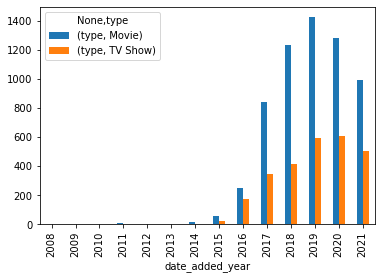

In [66]:
df_time_added.groupby(['date_added_year','type']).agg({'type':'count'}).unstack().plot(kind = "bar")

####AS SEEN EARLIER, HERE WE LEARN THAT MANY MOVIES CAME INTO NETFLIX AROUND 2019 AFTER WHICH IT DECLINED AGAIN


In [ ]:
NOW I WANT TO KNOW HOW LONG IT TAKES A NOT NEFLIX ORIGINAL TO BE ADDED TO NETFLIX

In [68]:
df_time_added["timetoadd"] = df_time_added.date_added_year - df_time_added.release_year


In [72]:
print("A DESCRIPTION OF HOW LONG IT TAKES FOR A MOVIE TO BE ADDED TO NETFLIX")

df_time_added.timetoadd.describe().to_frame()


A DESCRIPTION OF HOW LONG IT TAKES FOR A MOVIE TO BE ADDED TO NETFLIX


,timetoadd
count,8807.000000
mean,4.692971
std,8.784651
min,-3.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,93.000000


##### FROM THE SUMMARY OF OUR DATA SET
1. WE NOTICED THAT, ON AVERAGE CONTENTS TAKE ABOUT 4 YEARS & 9MONTHS BEFORE THEY GET TO NETFLIX
2. THIS MIGHT NOT BE REALLY CORRECT HAS THE DATA CALCULATES A NEGATIVE YEARS TO ADD AT SOME POINT(MAYBE NETFLIX DATA WAS MESSED WITH)
3. THE MAXIMUM YEAR BEING 93 CAN ALSO AFFECT OUR MEAN PRODUCED


--MANY MOVIES TAKE A YEAR TO BE ADDED AS THIS IS SEEN FROM OUR 75% PERCENTILE

NOW I WANT TO KNOW THE NUMBER OF MOVIES THAT TAKE MORE THAN A YEAR TO BE ADDED TO NETFLIX 

In [74]:
print("NUMBER OF MOVIES ADDED TO NETFLIX IN MORE THAN A YEAR:")
df_time_added[df_time_added['timetoadd']>0].title.count()


NUMBER OF MOVIES ADDED TO NETFLIX IN MORE THAN A YEAR:


5552

What's interesting is that there is a huge proportion (more than 5000) of old shows/movies being brought into netflix. most likley this does not incluide the netflix originals either.

# As, weve seen earlier, US, india, Uk, japan and sk are the ones where alot of movies are produced. US  obviously have the highest. But lets take a closer look in terms of netflix bringing more shows and movies form non english speaking areas. For this. let;s remove the shows produced in US and UK and see what happens.

In [75]:
df_time_added[df_time_added['timetoadd']>0].title.count()

5552

In [76]:
df_time_added = (df_time_added.drop('country', axis=1)
             .join
             (
             df_time_added.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')           
             ))
df_time_added=df_time_added[df_time_added['country']!='United States']
df_time_added=df_time_added[df_time_added['country']!='United Kingdom']


g_2=df_time_added.groupby('country').agg({'country':'count'})
g_2.apply(lambda x: x.sort_values(ascending=False)).head()


,country
country,
India,1046
Canada,445
France,393
Japan,318
Spain,232


###### Canada is also English speakingbut we will not take out Canada as it might contain french movies as well. Ok now let;' see how the trends have been over the years.

I ADDED NIGERIA TO THE GRAPH FOR A BIT OF FUN

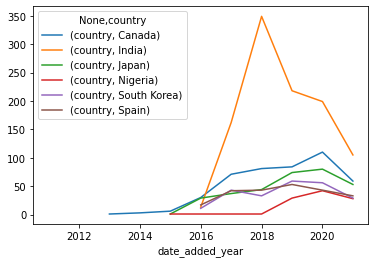

In [77]:
df_time_added_final=df_time_added[df_time_added['country'].isin(['India','Japan','South Korea','Canada','Spain','Nigeria'])]
df_time_added_final.groupby(['date_added_year','country']).agg({'country':'count'}).unstack().plot(kind = "line");

###### While india saw a boom(after being relatively non existent) after 2016, the other 4 countries did see a bit of an incraase too over time. however, not as much as we might have expected. nonetheless it looks like netflix is slowly increasing their number of foriegn films over time. AND NON SURPRISINGLY NIGERIA IS STILL THE LOWEST. SMH

Let's now look at the trend of when do shows and movies get released.

# GENRES

### FROM OUR EDA IT WAS NOTICED THAT THE 'LISTED IN' PART HAS MORE THAN ONE GENRE PER MOVIE AND THIS IS A REPORTING ERROR AS IT DOESNT COVER THE PARTICULAR GENRES PER MOVIE
(AS FOR THE REPORT THAT HAS  ALL THE GENRES LISTED, YOU'LL FIND THAT IN THE EDA FILE)


SO NOW I WOULD UNSTACK THE GENRES AND LET EACH GENRE STAND ALONE AND IT WILL SHOW THE MOVIES THEY ARE FOUND AND COUNTED 

In [78]:
# splitting the genres in different rows to use it in the viz later

#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_genre = df[['show_id', 'title','type', 'listed_in' ]]
df_genre = (df_genre.drop('listed_in', axis=1)
             .join
             (
             df_genre.listed_in
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('listed_in')           
             ))

In [79]:
df_genre_viz = df_genre[["title", "type", "listed_in"]]
df_genre_viz = df_genre_viz.groupby(['listed_in', 'type'])["title"].count().reset_index().sort_values('title')
df_genre_viz = df_genre_viz.rename(columns = {"title": "movies_count", "listed_in": "Genre"})

df_genre_movie = df_genre_viz.query("type == 'Movie'")
df_genre_tvshow = df_genre_viz.query("type == 'TV Show'")
# fig1 = px.bar(df_genre_movie, x='movies_count', y='Genre', color_discrete_sequence=px.colors.sequential.RdBu,
#        title='For which Genre the maximum content(Movies) are uploaded? ', height=600)
# fig2 = px.bar(df_genre_tvshow, x='Genre', y='movies_count', color_discrete_sequence=['Grey'],
#        title='For which Genre the maximum content(Shows) are uploaded? ')
#fig1.show() 
#fig2.show()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                   subplot_titles = ['For which Genre the maximum Movies are uploaded?', 'For which Genre the maximum Shows are uploaded? ' ],
                   horizontal_spacing = 0.3)
fig.add_trace(
    
    go.Bar(x= df_genre_movie['movies_count'], y= df_genre_movie['Genre'], orientation = 'h', marker_color='Maroon',  name="Movie",
           text = df_type['count_showids'], textposition='auto'),
    row=1, col=1)

fig.add_trace(
    
    go.Bar(x= df_genre_tvshow['movies_count'], y= df_genre_tvshow['Genre'], orientation = 'h', marker_color = 'Grey', name = "TV Show"),
    row=1, col=2)

fig.update_layout( height = 600)
fig.show()

##### FROM OUR DATA

TOP IN BOTH TV AND MOVIES ARE 
1, INTERNATONAL MOVIES 
2. DRAMAS
3, COMEDY

-PEOPLE WATCH MORE HORROR MOVIES THAN THEY DO FOR SERIES
-CRIME TV SHOWS ARE POPULAR AS CRIME MOVIES CANT BE FOUND
-PEOLPE WATCH MORE ACTION AND ADVENTURE MOVIES THAN SERIES
-NA FAITH AND SPIRITUALITY LOW PASS

# NOW TO MOVIES DURATION

In [34]:
df_9 = df.query("type == 'TV Show'")
df_9 = df_9[[ "title", "duration"]]
df_9 = df_9.groupby(['duration'])["title"].count().reset_index().sort_values('title', ascending = False)
#df_9 = df_9['duration'].replace("seasons", "")
df_9 = df_9.rename(columns = {"title": "TV Shows", "duration" : "Seasons"})


df_10 = df.query("type == 'Movie'")
df_10['duration'] = df_10['duration'].fillna("0")
df_10['duration'] = df_10['duration'].str.split(" ").str[0].astype(int)




fig_show = px.bar(df_9, x='Seasons', y='TV Shows', color_discrete_sequence=['grey'],
       title='TV Shows seasons ')
fig_Movie = px.histogram(df_10, x="duration" , nbins = 20, color_discrete_sequence=px.colors.sequential.RdBu
                  , title = "Movie Duration")

fig_Movie.show()
fig_show.show()


C:\Users\AbdulHafiz\AppData\Local\Temp\ipykernel_17800\205072209.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AbdulHafiz\AppData\Local\Temp\ipykernel_17800\205072209.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## FROM THE DATA ABOVE 
IT WAS NOTICED THAT MOST MOVIES HAVE A DURATION OF AROUND THE 80-120 MINUTES  AND ONLY A FEW MORE THAN 150minutes

MOST TV SHOWS END AT 1 SEASON AND THE NUBER OF SEASONS DECLINE PROGRESSIVLY 

In [35]:
df1.loc[df1["duration"] == "17 Seasons"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,No Data,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,Teens - Age above 14,17 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


##### BEING CURIOUS I WENT TO CHECK THE SOLE MOVIE THAT HAS 17 SEASON; AND IM NOT EVEN SURPRISED

In [81]:
df1.loc[df1["duration"] == "15 Seasons"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,Teens - Age above 14,15 Seasons,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4798,s4799,TV Show,NCIS,No Data,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,Teens - Age above 14,15 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...


# CAST


## TO ANALYSE THE CAST, I WOULD NEED TO UNPACK THE CASTS AS WE CAN REMEMBER FROM OUR EDA THAT THE ACTORS LISTED ARE IN MORE THAN ONE MOVIE

In [82]:
# splitting the countries in different rows 
#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_cast = df1.copy()
df_cast = (df_cast.drop('cast', axis=1)
             .join
             (
             df_cast.cast
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('cast')           
             ))

## THE TOP 10 ACTORS IN MOVIES

In [83]:
df_cast.loc[(df_cast["type"]=='Movie') & (df_cast["cast"] != 'No Data')]["cast"].value_counts().head(10).to_frame()

,cast
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30
Amitabh Bachchan,28
Julie Tejwani,28
Paresh Rawal,28
Rupa Bhimani,27
Boman Irani,27


[Text(0.5, 1.0, 'Number of movies released by Year')]

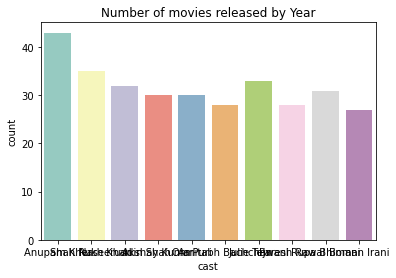

In [84]:
#sns.countplot(x="release_year", data=df1,order = df1['release_year'].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')
sns.countplot(x="cast", data=df_cast,order = df_cast.loc[(df_cast["type"]=='Movie') & (df_cast["cast"] != 'No Data')]["cast"].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')#

##### FROM HERE MOST ACTORS IN MOVIES ARE INDIAN ACTORS AS ANUPAM KHER IS SEEN IN 42 DIFF COUNTRIES
DONT KNOW WHY IT IS LIKE THIS AS I WOULD HAVE EXPECTED TO BE AMERICAN

## TOP 10 ACTORS IN SERIES

[Text(0.5, 1.0, 'Number of movies released by Year')]

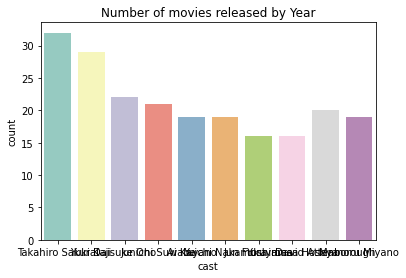

In [86]:
sns.countplot(x="cast", data=df_cast,order = df_cast.loc[(df_cast["type"]=='TV Show') & (df_cast["cast"] != 'No Data')]["cast"].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')#

In [85]:
df_cast.loc[(df_cast["type"]=='TV Show') & (df_cast["cast"] != 'No Data')]["cast"].value_counts().head(10).to_frame()

,cast
Takahiro Sakurai,25
Yuki Kaji,19
Daisuke Ono,17
Junichi Suwabe,17
Ai Kayano,17
Yuichi Nakamura,16
Jun Fukuyama,15
Yoshimasa Hosoya,15
David Attenborough,14
Mamoru Miyano,13


##### FROM HERE MOST ACTORS IN SERIES ARE KOREANS/JAPENESE; THIS CAN STILL BE EXPLAINED FROM SOUTH KOREANS AND JAPAN LEADING THE SERIES DEPARTMENT

## TOP 10 OVERALL ACTORS

[Text(0.5, 1.0, 'Number of movies released by Year')]

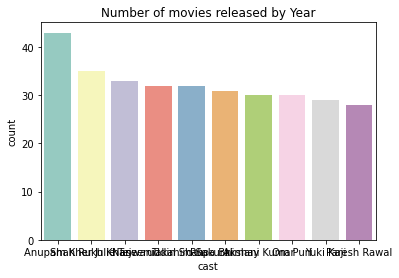

In [88]:
sns.countplot(x="cast", data=df_cast,order = df_cast.loc[(df_cast["cast"] != 'No Data')]["cast"].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')#

In [87]:
df_cast.loc[(df_cast["cast"] != 'No Data')]["cast"].value_counts().head(10).to_frame()

,cast
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Akshay Kumar,30
Om Puri,30
Yuki Kaji,29
Paresh Rawal,28


###### OVERALL TOP 10 ACTORS IN BOTH MOVIES AND SERIES ARE STILL INDIANS

###### Most of Anupam Kher works are Movies

In [94]:
#df_cast.groupby(['cast']).agg({'type':'count'}).tail(10).unstack().plot(kind = "bar")

# DIRECTORS

In [95]:
# splitting the countries in different rows 
#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_directors = df1.copy()
df_directors = (df_directors.drop('director', axis=1)
             .join
             (
             df_directors.director
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('director')           
             ))

## TOP 10 OVERALL DIRECTORS

[Text(0.5, 1.0, 'Number of movies released by Year')]

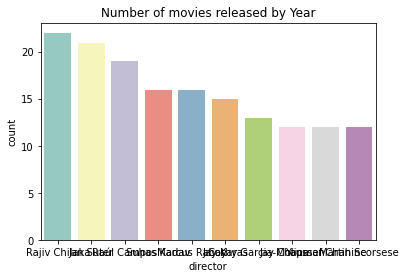

In [98]:
sns.countplot(x="director", data=df_directors,order = df_directors.loc[(df_directors["director"] != 'No Data')]["director"].value_counts().index[:10],palette="Set3").set(title='Number of movies released by Year')#

In [96]:
df_directors.loc[(df_directors["director"] != 'No Data')]["director"].value_counts().head(10).to_frame()

,director
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12


## THE TOP 10 DIRECTORS IN MOVIES

In [99]:
df_directors.loc[(df_directors["type"]=='Movie') & (df_directors["director"] != 'No Data')]["director"].value_counts().head(20).to_frame()

,director
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,15
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


## THE TOP 10 DIRECTORS IN SERIES

In [100]:
df_directors.loc[(df_directors["type"]=='TV Show') & (df_directors["director"] != 'No Data')]["director"].value_counts().head(10).to_frame()

,director
Alastair Fothergill,3
Ken Burns,3
Jung-ah Im,2
Gautham Vasudev Menon,2
Iginio Straffi,2
Hsu Fu-chun,2
Stan Lathan,2
Joe Berlinger,2
Shin Won-ho,2
Lynn Novick,2


##### THE TOP 7 OVERALL DIRECTORS ARE THOSE ARE THE SAME FOR MOVIES

In [ ]:
df_directors.groupby(['director','type']).agg({'type':'count'}).head(10).unstack().plot(kind = "bar")

In [ ]:
import nbconvert

# DECRIPTION FEAUTURE ANALYSIS

### FROM OUR EDA

In [101]:
print("THE MOST COMMON DECRIPTION PATTERN IS:")

THE MOST COMMON DECRIPTION PATTERN IS:


###### Paranormal activity at a lush, abandoned property....

E BE LIKE SAY NA THE SAME THEME ALL THIS HORROR MOVIES DEY FOLLOW JARE